Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.shape

(2000, 21)

In [ ]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# VISUALIZATIONS

<Axes: xlabel='price_range', ylabel='count'>

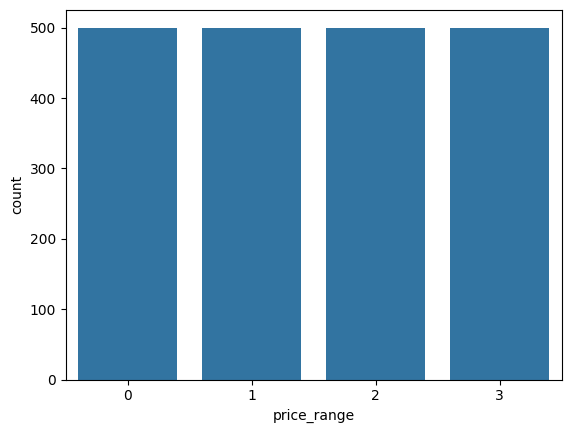

In [ ]:
sns.countplot(x='price_range',data=df)

In [ ]:
def plots(x):
    plt.figure(figsize=(7,4))
    plt.subplot(1,2,1)
    sns.histplot(df[x])
    plt.subplot(1,2,2)
    sns.distplot(df[x])
    plt.tight_layout(pad = 1.0)
    plt.axvline(df[x].mean(),color='red',label='mean')
    plt.axvline(df[x].median(),color='black',label='median')
    plt.legend()

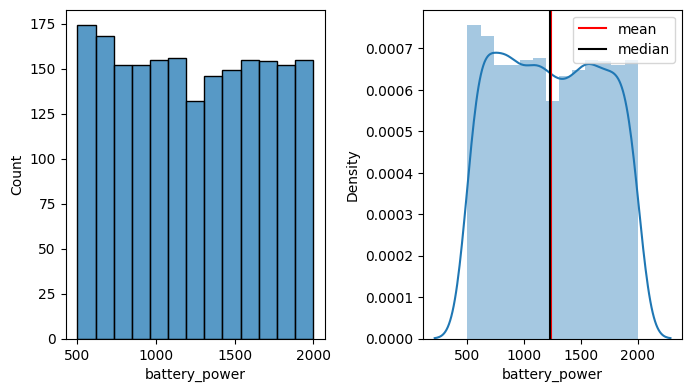

In [ ]:
plots('battery_power')

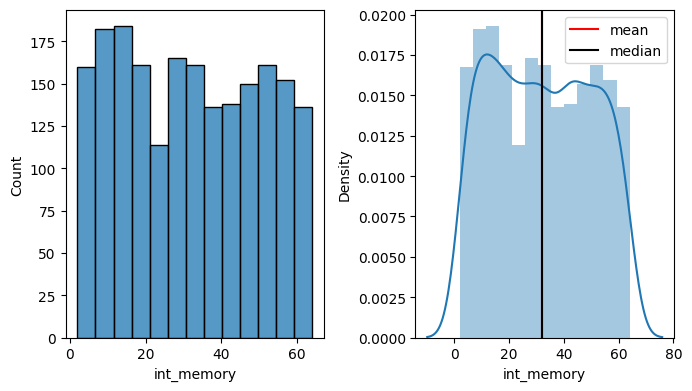

In [ ]:
plots('int_memory')

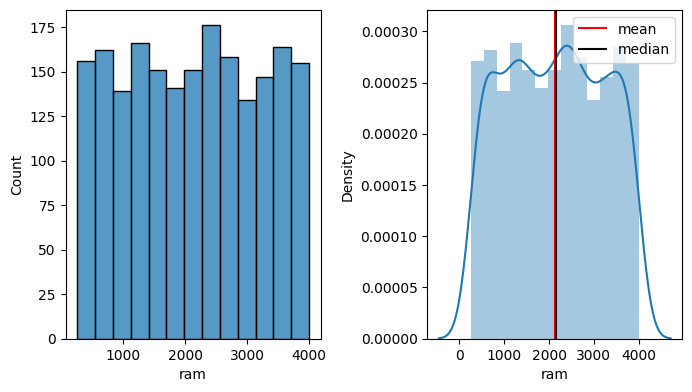

In [ ]:
plots('ram')

<Axes: xlabel='wifi', ylabel='count'>

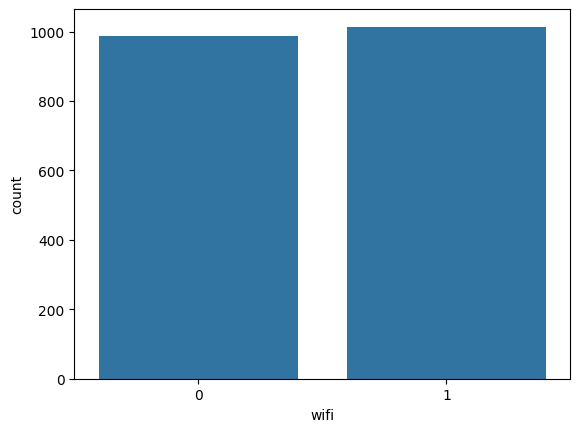

In [ ]:
sns.countplot(x='wifi',data=df)

<Axes: xlabel='dual_sim', ylabel='count'>

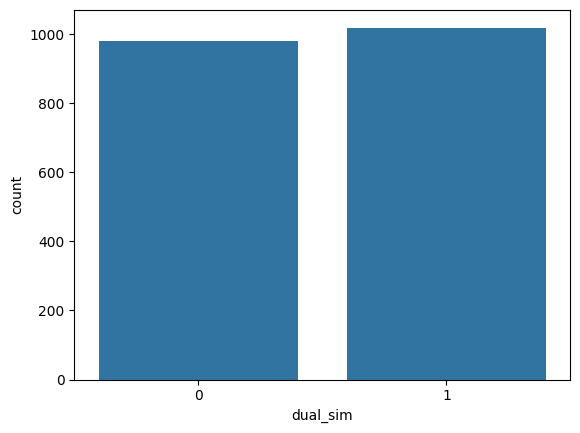

In [ ]:
sns.countplot(x='dual_sim',data=df)

<Axes: xlabel='blue', ylabel='count'>

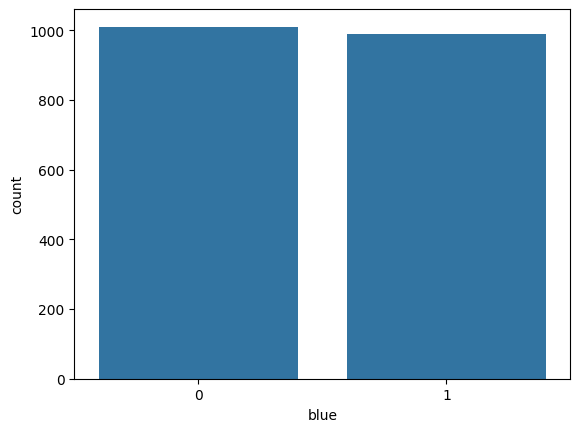

In [ ]:
sns.countplot(x='blue',data=df)

<Axes: xlabel='touch_screen', ylabel='count'>

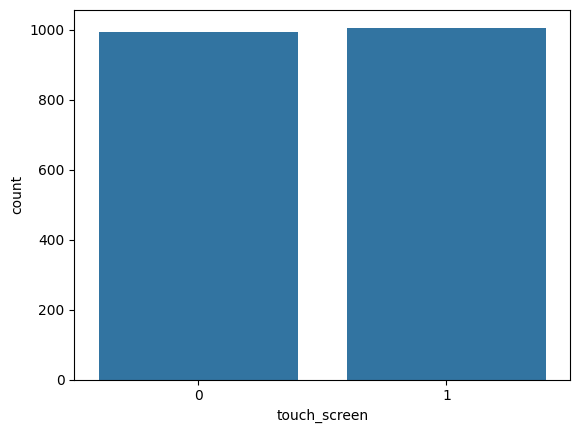

In [ ]:
sns.countplot(x='touch_screen',data=df)

<Axes: ylabel='count'>

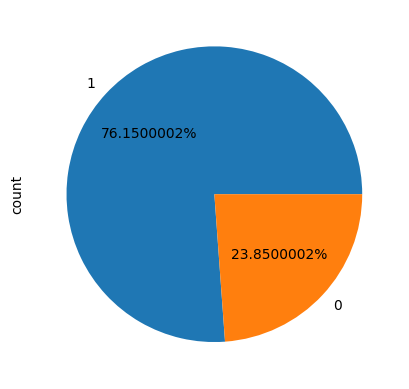

In [ ]:
df['three_g'].value_counts().plot(kind='pie',autopct='%1f2%%')

<Axes: ylabel='count'>

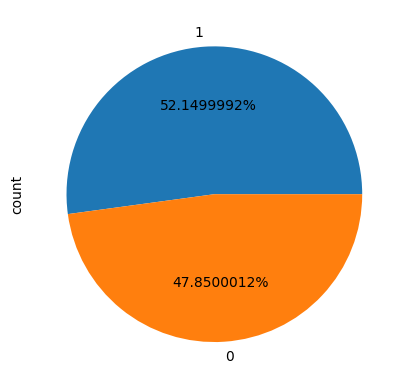

In [ ]:
df['four_g'].value_counts().plot(kind='pie',autopct='%1f2%%')

In [ ]:
korr = df.corr()
korr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

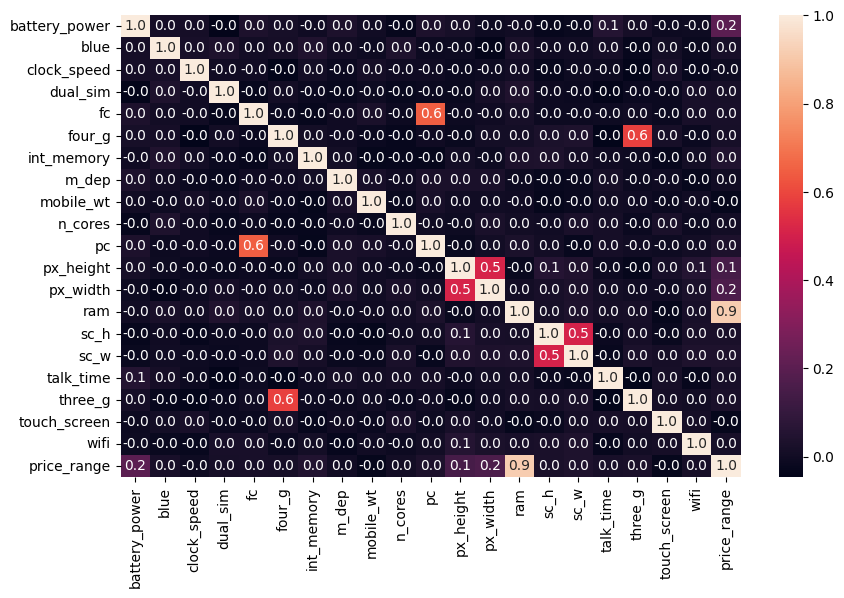

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(korr,annot=True,fmt='.1f')

In [ ]:
df.drop(['clock_speed','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'],axis=1,inplace=True)

In [ ]:
df.drop(['dual_sim','blue'],axis=1,inplace=True)

In [ ]:
df

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


### VISUALIZATIONS INSIGHTS

The insights we get by Visualzing the dataset.

     > Seems like people are more likely to buy a Expensive phone than the affordable one.
     > The need of Wifi,Bluetooth and dual sim are higher wherelse the number of touch screens are balanced.
     > the number of Three G phones are higher than the numbers of Four G phones.
     

# MODEL

In [ ]:
x = df.iloc[:,:-1]
y = df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('Accuracy Score :',accuracy_score(y_test,y_pred))

    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)

    print('Training Performance',train)
    print('Testing Performnace',test)

    return model

#### Logistic Regression

In [ ]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.93      0.98      0.95        96
           2       0.93      0.92      0.92       106
           3       0.97      0.94      0.96       106

    accuracy                           0.95       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.95      0.95       400

Accuracy Score : 0.955
Training Performance 0.963125
Testing Performnace 0.955


LogisticRegression()

#### KNN

In [ ]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        92
           1       0.90      0.94      0.92        96
           2       0.82      0.89      0.85       106
           3       0.95      0.85      0.90       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

Accuracy Score : 0.9075
Training Performance 0.955625
Testing Performnace 0.9075


KNeighborsClassifier()

#### SVM

In [ ]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.93      0.98      0.95        96
           2       0.93      0.93      0.93       106
           3       0.99      0.93      0.96       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

Accuracy Score : 0.9575
Training Performance 0.960625
Testing Performnace 0.9575


SVC()

#### Decision Tree

In [ ]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        92
           1       0.82      0.88      0.84        96
           2       0.82      0.81      0.82       106
           3       0.92      0.88      0.90       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Accuracy Score : 0.87
Training Performance 1.0
Testing Performnace 0.87


DecisionTreeClassifier()

#### XGBOOST

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score ',accuracy_score(y_test,y_pred))

train = xg.score(X_train,y_train)
test = xg.score(X_test,y_test)

print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        92
           1       0.85      0.96      0.90        96
           2       0.88      0.86      0.87       106
           3       0.95      0.91      0.93       106

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400

Accuracy Score  0.9125
Training Performance 1.0
Testing Performnace 0.9125


#### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

train = rf.score(X_train,y_train)
test = rf.score(X_test,y_test)

print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        92
           1       0.86      0.92      0.89        96
           2       0.87      0.91      0.89       106
           3       0.97      0.90      0.93       106

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

Accuracy Score :  0.91
Training Performance 1.0
Testing Performnace 0.91


### ACCURACY RESULTS

In [ ]:
Accuracy_Results = pd.DataFrame({'Logistic Regression':['95%'],'KNN':['90%'],'Decision tree':['87%'],'SVM':['95%'],'Xgboost':['91%'],'Random Forest':['91%']},index=['Accuracy'])

In [ ]:
Accuracy_Results

,Logistic Regression,KNN,Decision tree,SVM,Xgboost,Random Forest
Accuracy,95%,90%,87%,95%,91%,91%


 The Models have perfectly been trained and predicted the split testset with High accuracy.

# CONCLUSION

In this project of Mobile Price Classiification we have to predict the price range of a mobile phone that the person can purchase.


First we clean the data by seeing if there are no null values or columns are not in the correct datatype.

By appyling the Elbow Method we get the predicted price range.

Then we visualize the dataset by the help of various tool like countplot,distplot,heatmap and pie diagram.

Then we build the model by applying algorithms.

All the models are working properly and the Support Vector Machine(SVM) gives you the highest accuracy score.

In [ ]:
def predictMR():
    battery_power = eval(input('enter the battery power : '))
    px_height = eval(input('enter the pixel height : '))
    px_width = eval(input('enter your pixel width :'))
    ram = eval(input('enter the ram value (upto 4 digits) : '))

    newob = [[battery_power,px_height,px_width,ram]]
    yp = svm.predict(newob)[0]
    print('if 3 represent very expensive')
    print('if 2 represent expensive')
    print('if 1 represent bit expensive')
    print('if 0 represent affordable')
    print('the price range is :',yp)

In [ ]:
predictMR()

enter the battery power : 1003
enter the pixel height : 6
enter your pixel width :3
enter the ram value (upto 4 digits) : 1256
if 3 represent very expensive
if 2 represent expensive
if 1 represent bit expensive
if 0 represent affordable
the price range is : 0
